In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import pytz
import seaborn as sns

In [2]:
column_names = ['date','solar']
column_names1 = ['Date', 'Time','Solar','Temperature','Wind Speed','Wind','Humidity','atmospheric','sunshine','Insolation','Total cloud','Municipal','Ground temperature']

In [3]:
data = pd.read_csv("D:\Portfolio\postech\SolarPV_Elec_Problem.csv", header = None, names=column_names)

In [4]:
plus_data = pd.read_excel("D:\Portfolio\postech\data.xlsx",names = column_names1)

In [5]:
data.head()

,date,solar
0,2019-07-01T00:00:00+09:00,0.0
1,2019-07-01T00:15:00+09:00,0.0
2,2019-07-01T00:30:00+09:00,0.0
3,2019-07-01T00:45:00+09:00,0.0
4,2019-07-01T01:00:00+09:00,0.0


In [6]:
plus_data.head()

,Date,Time,Solar,Temperature,Wind Speed,Wind,Humidity,atmospheric,sunshine,Insolation,Total cloud,Municipal,Ground temperature
0,2019-07-01,0,0.0,23.3,1.3,250,84.0,997.4,0.0,0.0,8,643,22.6
1,2019-07-01,1,0.0,23.2,0.8,250,86.0,997.3,0.0,0.0,10,547,23.1
2,2019-07-01,2,0.0,23.1,1.1,250,86.0,997.0,0.0,0.0,7,506,23.1
3,2019-07-01,3,0.0,23.0,1.3,250,87.0,997.1,0.0,0.0,9,472,23.0
4,2019-07-01,4,0.0,22.7,0.6,250,88.0,997.3,0.0,0.0,9,366,22.2


|변수 명|변수 설명|
|-----|-------|
|**Date**|가동월일|
|**time**|가동시간|
|**solar**|태양광|
|**temperature**|기온|
|**windspeed**|풍력|
|**wind**|풍향|
|**humidity**|습도|
|**atmospheric**|현지기압|
|**sunshine**|일조|
|**insolation**|일사|
|**total cloud**|구름량|
|**municipal**|가시거리|
|**ground temperature**|지면온도|

In [7]:
plus_data["Date"] = pd.to_datetime(plus_data["Date"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 2 columns):
date     35125 non-null object
solar    34837 non-null float64
dtypes: float64(1), object(1)
memory usage: 548.9+ KB


In [8]:
plus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 13 columns):
Date                  8782 non-null datetime64[ns]
Time                  8782 non-null int64
Solar                 8710 non-null float64
Temperature           8782 non-null float64
Wind Speed            8782 non-null float64
Wind                  8782 non-null int64
Humidity              8782 non-null float64
atmospheric           8782 non-null float64
sunshine              8782 non-null float64
Insolation            8782 non-null float64
Total cloud           8782 non-null int64
Municipal             8782 non-null int64
Ground temperature    8782 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 892.0 KB


In [9]:
print(len(data))

35125


In [9]:
def utc_change (string) : 
    year = string[:4]
    month = string[5:7]
    day = string[8:10]
    hour = string[11:13]
    if hour in ":" :
        hour == int(string[11:12])
    else : 
        hour == int(string[11:13])
    minute = string[14:16]
    second = string[17:19]
    
    date = year + "-" + month + "-" + day + " " + str(hour)

    return date
utc_change(data.loc[0]["date"])

'2019-07-01 00'

In [10]:
data['date'] = data['date'].apply(lambda x :utc_change(x))

In [11]:
data.head()

,date,solar
0,2019-07-01 00,0.0
1,2019-07-01 00,0.0
2,2019-07-01 00,0.0
3,2019-07-01 00,0.0
4,2019-07-01 01,0.0


In [12]:
data['solar'].groupby(data['date']).sum()

date
2019-07-01 00     0.000000
2019-07-01 01     0.000000
2019-07-01 02     0.000000
2019-07-01 03     0.000000
2019-07-01 04     0.000000
2019-07-01 05     0.099794
2019-07-01 06     2.393866
2019-07-01 07     5.345211
2019-07-01 08    12.107435
2019-07-01 09    24.455758
2019-07-01 10    43.047528
2019-07-01 11    60.714603
2019-07-01 12    65.314080
2019-07-01 13    49.358870
2019-07-01 14    42.351655
2019-07-01 15    52.151504
2019-07-01 16    32.386110
2019-07-01 17    30.793940
2019-07-01 18    16.943006
2019-07-01 19     2.847239
2019-07-01 20     0.036000
2019-07-01 21     0.000000
2019-07-01 22     0.000000
2019-07-01 23     0.000000
2019-07-02 00     0.000000
2019-07-02 01     0.000000
2019-07-02 02     0.000000
2019-07-02 03     0.000000
2019-07-02 04     0.000000
2019-07-02 05     0.206794
                   ...    
2020-06-29 16    11.988000
2020-06-29 17     4.120000
2020-06-29 18     1.022000
2020-06-29 19     0.112000
2020-06-29 20     0.001000
2020-06-29 21     0.000

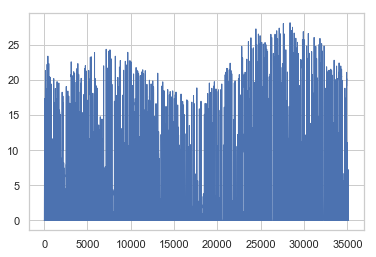

In [14]:
sns.set(style="whitegrid")
sns.lineplot(data=data['solar'], palette="tab10", linewidth=1.0)

In [10]:
p_corr = plus_data.corr().round(2)

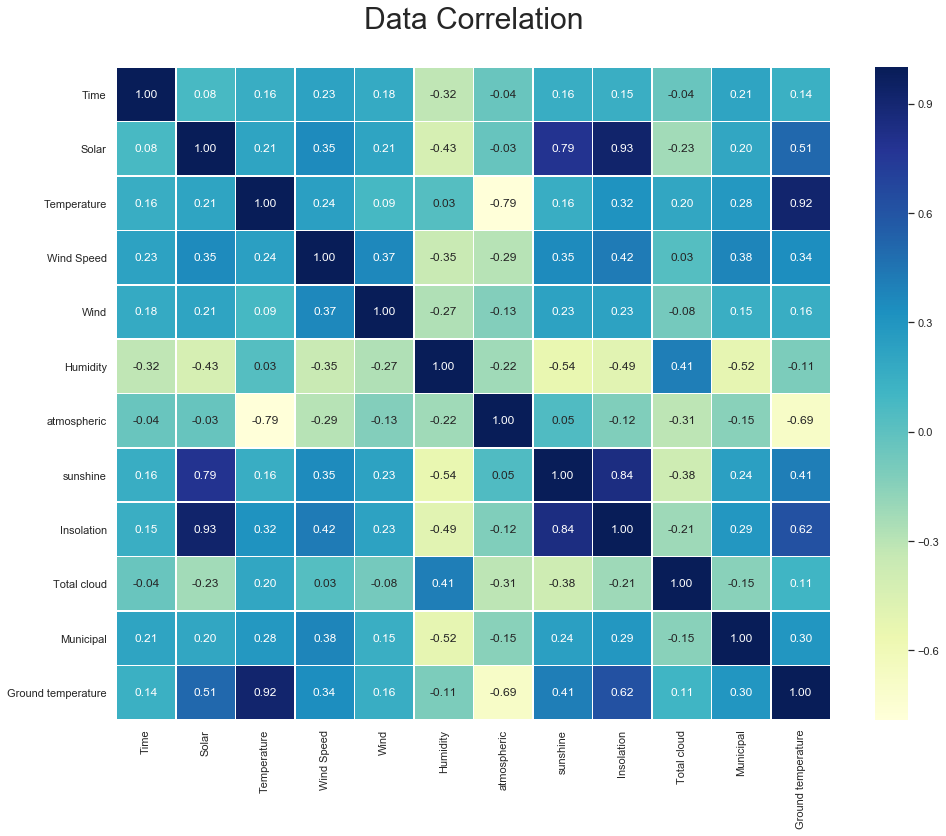

In [11]:
sns.set()


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16,12))
plt.title("Data Correlation", fontsize=30, position=(0.5, 1.0+0.05))
sns.heatmap(p_corr, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='YlGnBu')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


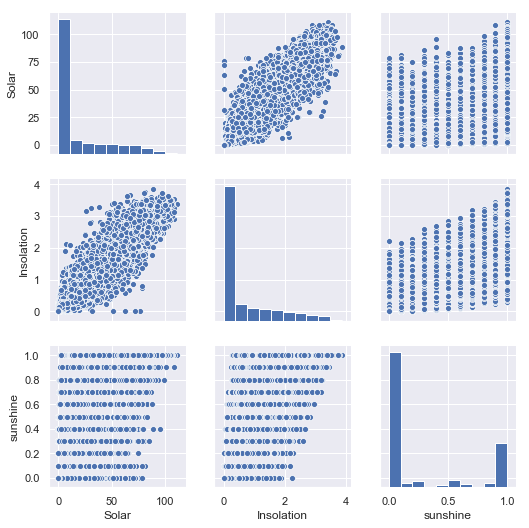

In [12]:
sns.pairplot(plus_data[['Solar','Insolation','sunshine']])
            

plt.show()

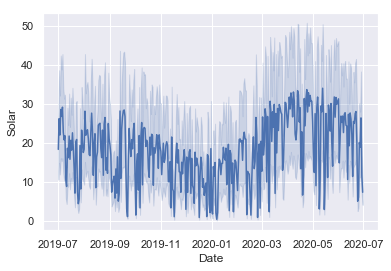

In [102]:
sns.lineplot(x="Date", y="Solar",data=plus_data)

## linear Regression

In [88]:
import numpy as np

if any(plus_data['Solar']) == "NAN" :
    plus_data['Solar'] == plus_data.replace(mean(plus_data['Solar']),np.nan)
else :
    plus_data['Solar']

In [97]:
plus_data['Date']['2020-05-31':'2020-06-01']

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2020-05-31] of <class 'str'>

In [89]:
plus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 13 columns):
Date                  8782 non-null datetime64[ns]
Time                  8782 non-null int64
Solar                 8710 non-null float64
Temperature           8782 non-null float64
Wind Speed            8782 non-null float64
Wind                  8782 non-null int64
Humidity              8782 non-null float64
atmospheric           8782 non-null float64
sunshine              8782 non-null float64
Insolation            8782 non-null float64
Total cloud           8782 non-null int64
Municipal             8782 non-null int64
Ground temperature    8782 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 892.0 KB


In [77]:
X = pd.DataFrame(np.c_[plus_data['Insolation'], plus_data['sunshine']], columns = ['Insolation','sunshine'])
Y = plus_data['Solar']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7025, 2)
(1757, 2)
(7025,)
(1757,)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형회귀모델을 만들어 lin_model에 저장
lin_model = LinearRegression()

# 모델을 학습하도록 함.
# x는 2차원 y는 기존의 값을 입력함.
lin_model.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [90]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

**RMSE** : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도

**R2** : 결정계수는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도 

In [29]:
# rm과 medv의 회귀계수

lin_model.fit(X , y = data["MEDV"])

prediction = lin_model.predict(X)
print('a value = ', lin_model.intercept_)

print('b balue = ', lin_model.coef_)

a value =  18.567111505395225
b balue =  [-0.57180569  4.51542094 -0.93072256]


In [ ]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'],data['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = data['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형회귀모델을 만들어 lin_model에 저장
lin_model = LinearRegression()

# 모델을 학습하도록 함.
# x는 2차원 y는 기존의 값을 입력함.
lin_model.fit(X_train, Y_train)

# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

**RMSE** : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도

**R2** : 결정계수는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도 

# rm과 medv의 회귀계수

lin_model.fit(X , y = data["MEDV"])

prediction = lin_model.predict(X)
print('a value = ', lin_model.intercept_)

print('b balue = ', lin_model.coef_)

## RNN

## LSTM